In [1]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

In [2]:
import os
import zipfile

local_zip = '../dataset/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [4]:
print('Total pawn images: ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('Total king images: ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('Total knight images: ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

Total pawn images:  107
Total king images:  76
Total knight images:  106


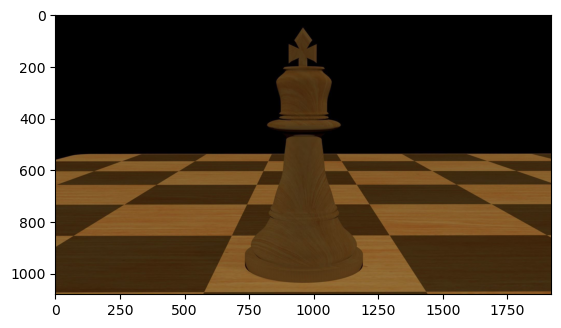

In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.1 # set validation split
)

In [7]:
# Karena direktori hanya ada 1 direktori tanpa training dan testing,
# maka cukup dengan validation_split akan membagi data dengan memberi nilai training atau testing pada data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training' # set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

c:\Users\ghifarullah19\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=2
)

Epoch 1/50


c:\Users\ghifarullah19\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 - 44s - 700ms/step - accuracy: 0.1703 - loss: 1.8403 - val_accuracy: 0.1731 - val_loss: 1.7787
Epoch 2/50
63/63 - 29s - 455ms/step - accuracy: 0.2164 - loss: 1.7825 - val_accuracy: 0.1923 - val_loss: 1.7834
Epoch 3/50
63/63 - 32s - 511ms/step - accuracy: 0.2004 - loss: 1.7842 - val_accuracy: 0.1731 - val_loss: 1.7839
Epoch 4/50
63/63 - 33s - 517ms/step - accuracy: 0.1884 - loss: 1.7687 - val_accuracy: 0.1923 - val_loss: 1.7806
Epoch 5/50
63/63 - 32s - 509ms/step - accuracy: 0.2345 - loss: 1.7555 - val_accuracy: 0.2115 - val_loss: 1.7811
Epoch 6/50
63/63 - 30s - 484ms/step - accuracy: 0.2405 - loss: 1.7416 - val_accuracy: 0.2115 - val_loss: 1.7762
Epoch 7/50
63/63 - 27s - 435ms/step - accuracy: 0.2585 - loss: 1.7249 - val_accuracy: 0.2115 - val_loss: 1.8153
Epoch 8/50
63/63 - 31s - 492ms/step - accuracy: 0.2926 - loss: 1.6699 - val_accuracy: 0.2115 - val_loss: 1.7314
Epoch 9/50
63/63 - 30s - 481ms/step - accuracy: 0.2866 - loss: 1.6308 - val_accuracy: 0.2115 - val_loss: 1.7475
Epo

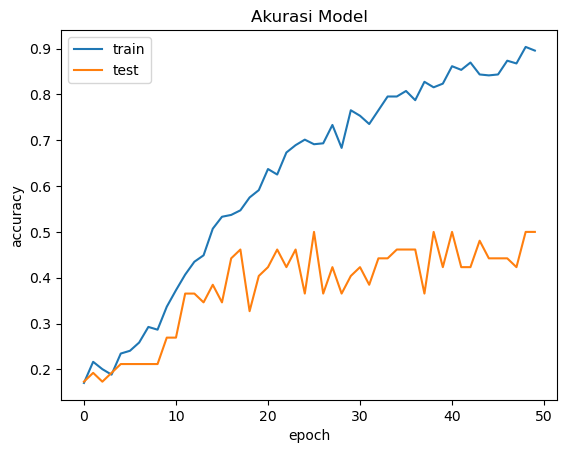

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

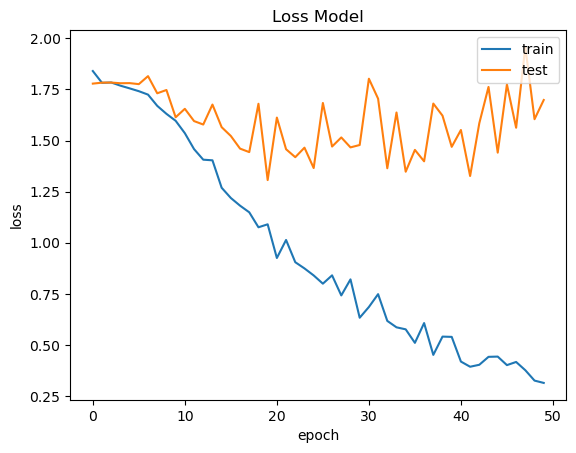

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()